In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(13320, 9)

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Data Cleaning

In [5]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
def meta_data(data):
    total = data.isnull().sum()
    percent = (total/len(data))*100
    datatype = data.dtypes
    unique = data.nunique()
    
    return pd.concat([total,percent,datatype,unique],axis = 1, keys = ['total_missing_values','percent','datatype','unique'])

In [7]:
meta_data(data)

,total_missing_values,percent,datatype,unique
area_type,0,0.000000,object,4
availability,0,0.000000,object,81
location,1,0.007508,object,1305
size,16,0.120120,object,31
society,5502,41.306306,object,2688
total_sqft,0,0.000000,object,2117
bath,73,0.548048,float64,19
balcony,609,4.572072,float64,4
price,0,0.000000,float64,1994


In [8]:
data1 = data.drop(['availability','society'],axis = 1)

In [9]:
data1

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [10]:
data1.shape

(13320, 7)

In [11]:
data1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [12]:
data2 = data1.dropna()
data2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
data2.shape

(12710, 7)

In [14]:
data2['bhk'] = data2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\US593\AppData\Local\Temp\ipykernel_17300\747557919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['bhk'] = data2['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
data2

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [16]:
data2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [17]:
data2['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [18]:
data2[data2['bhk']>20]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [19]:
data2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
data2[~data2['total_sqft'].apply(is_float)].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [22]:
def convert_range_to_average(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try : 
        return float(x)
    except : 
        return None

In [23]:
data2['area'] = data2['total_sqft'].apply(convert_range_to_average)

C:\Users\US593\AppData\Local\Temp\ipykernel_17300\2948981835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['area'] = data2['total_sqft'].apply(convert_range_to_average)


In [24]:
data2

,area_type,location,size,total_sqft,bath,balcony,price,bhk,area
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3,1715.0
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5,3453.0
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2,1141.0
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4,4689.0


In [25]:
data2['area'].isnull().sum()

42

In [26]:
data2 = data2.dropna()

In [27]:
data2.shape

(12668, 9)

In [28]:
meta_data(data2)

,total_missing_values,percent,datatype,unique
area_type,0,0.0,object,4
location,0,0.0,object,1259
size,0,0.0,object,27
total_sqft,0,0.0,object,1935
bath,0,0.0,float64,16
balcony,0,0.0,float64,4
price,0,0.0,float64,1921
bhk,0,0.0,int64,16
area,0,0.0,float64,1886


### Feature Engineering

In [29]:
data2.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,area
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0


In [30]:
data2.drop(['size','total_sqft'],inplace = True,axis = 1)

C:\Users\US593\AppData\Local\Temp\ipykernel_17300\1483511189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(['size','total_sqft'],inplace = True,axis = 1)


In [31]:
data2.head()

,area_type,location,bath,balcony,price,bhk,area
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0


In [32]:
data2['price/sqft'] = (data2['price'] * 100000)/data2['area']

C:\Users\US593\AppData\Local\Temp\ipykernel_17300\896603151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['price/sqft'] = (data2['price'] * 100000)/data2['area']


In [33]:
data2.location.nunique()

1259

In [34]:
data2.location = data2.location.apply(lambda x : x.strip())

C:\Users\US593\AppData\Local\Temp\ipykernel_17300\3340037821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.location = data2.location.apply(lambda x : x.strip())


In [35]:
data2.head()

,area_type,location,bath,balcony,price,bhk,area,price/sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [36]:
loc_stats = data2.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [37]:
loc_stats

location
Whitefield              514
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          259
Thanisandra             233
                       ... 
1 Giri Nagar              1
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
whitefiled                1
Name: location, Length: 1248, dtype: int64

In [38]:
loc_less_than_15 = loc_stats[loc_stats<15]

In [39]:
len(loc_less_than_15)

1069

In [40]:
loc_less_than_15.head()

location
Sultan Palaya    14
Giri Nagar       14
Chamrajpet       14
NGR Layout       14
NRI Layout       14
Name: location, dtype: int64

In [41]:
data2.location = data2.location.apply(lambda x : 'other' if x in loc_less_than_15 else x)

C:\Users\US593\AppData\Local\Temp\ipykernel_17300\1288258395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.location = data2.location.apply(lambda x : 'other' if x in loc_less_than_15 else x)


In [42]:
data2.location.nunique()

180

### Outlier Detection & Removal

In [43]:
data2[data2.area/data2.bhk < 250].head()

,area_type,location,bath,balcony,price,bhk,area,price/sqft
58,Plot Area,other,4.0,1.0,150.0,6,1407.0,10660.980810
68,Plot Area,Devarachikkanahalli,7.0,0.0,85.0,8,1350.0,6296.296296
70,Plot Area,other,3.0,2.0,100.0,3,500.0,20000.000000
78,Built-up Area,Kaval Byrasandra,1.0,0.0,22.0,2,460.0,4782.608696
89,Plot Area,Rajaji Nagar,6.0,3.0,160.0,6,710.0,22535.211268


In [44]:
data2 = data2[~ (data2.area/data2.bhk < 250)]

In [45]:
data2.shape

(12139, 8)

In [46]:
data2['price/sqft'].describe()

count     12139.000000
mean       6247.976225
std        4025.906065
min         267.829813
25%        4200.000000
50%        5271.084337
75%        6874.439629
max      176470.588235
Name: price/sqft, dtype: float64

In [47]:
data2[(data2['price/sqft']<1000)|(data2['price/sqft']>20000)]

,area_type,location,bath,balcony,price,bhk,area,price/sqft
159,Plot Area,other,4.0,0.0,760.0,4,3750.0,20266.666667
480,Built-up Area,other,4.0,2.0,260.0,4,1150.0,22608.695652
674,Built-up Area,Yelahanka,3.0,3.0,130.0,3,35000.0,371.428571
743,Super built-up Area,other,4.0,3.0,1250.0,4,5270.0,23719.165085
810,Plot Area,other,4.0,1.0,80.0,4,10961.0,729.860414
...,...,...,...,...,...,...,...,...
12918,Plot Area,other,5.0,1.0,450.0,5,1650.0,27272.727273
13019,Plot Area,other,4.0,1.0,500.0,5,2040.0,24509.803922
13132,Plot Area,other,5.0,1.0,350.0,4,1200.0,29166.666667
13200,Plot Area,other,6.0,3.0,2800.0,6,8000.0,35000.000000


In [48]:
data2 = data2[~((data2['price/sqft']<1000)|(data2['price/sqft']>20000))]

In [49]:
data2.shape

(11996, 8)

In [50]:
data2['price/sqft'].describe()

count    11996.000000
mean      6006.981461
std       2887.128442
min       1166.666667
25%       4193.548387
50%       5243.356479
75%       6792.626036
max      20000.000000
Name: price/sqft, dtype: float64

In [51]:
# the given func remove outliers based on the normal distributions of every location

In [52]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key,sdf in df.groupby('location'):
        m = np.mean(sdf['price/sqft'])
        st = np.std(sdf['price/sqft'])
        if m > 7000:
            print(f"mean : {m} ..... std : {st}")
        rdf  = sdf[(sdf['price/sqft']>(m-st))&(sdf['price/sqft']<(m+st))]
        df_out = pd.concat([df_out,rdf],ignore_index=True)
    return df_out

In [53]:
data3 = remove_outliers(data2)

mean : 8725.803011333152 ..... std : 2366.7726837754435
mean : 13838.683127572016 ..... std : 4529.413385344334
mean : 7657.685379993524 ..... std : 2790.178135309892
mean : 7447.72466192013 ..... std : 2079.758767437019
mean : 7822.041435432731 ..... std : 4003.851917483834
mean : 10694.968790729143 ..... std : 3300.607092504595
mean : 7175.8780177175695 ..... std : 3860.331499497241
mean : 9943.640556681408 ..... std : 2441.2165161429743
mean : 9952.686739936604 ..... std : 4143.750718295053
mean : 9474.299306707802 ..... std : 2534.1657485857636
mean : 9039.377440346627 ..... std : 2872.6306795972023
mean : 10344.12171184686 ..... std : 3231.2951456632163
mean : 8215.006931201428 ..... std : 3403.5954079176913
mean : 8947.092850893274 ..... std : 4217.817896199625
mean : 7320.386265057009 ..... std : 2287.791261586403
mean : 9054.195251025752 ..... std : 2903.2619069739426
mean : 8318.835033999727 ..... std : 3741.685993981324
mean : 7365.602217070309 ..... std : 905.1351119259105
m

In [54]:
data3.shape

(9454, 8)

In [55]:
data3.describe()

,bath,balcony,price,bhk,area,price/sqft
count,9454.000000,9454.000000,9454.000000,9454.000000,9454.000000,9454.000000
mean,2.421620,1.594880,81.997354,2.529829,1444.377266,5433.774798
std,0.905186,0.796851,60.744261,0.843585,743.627170,1738.501086
min,1.000000,0.000000,8.000000,1.000000,284.000000,2090.909091
25%,2.000000,1.000000,48.532500,2.000000,1100.000000,4249.917219
50%,2.000000,2.000000,65.000000,2.000000,1265.000000,5109.890110
75%,3.000000,2.000000,95.000000,3.000000,1600.000000,6250.000000
max,13.000000,3.000000,1824.000000,13.000000,30400.000000,16043.478261


In [56]:
data3.head()

,area_type,location,bath,balcony,price,bhk,area,price/sqft
0,Super built-up Area,1st Phase JP Nagar,4.0,3.0,250.0,4,2825.0,8849.557522
1,Super built-up Area,1st Phase JP Nagar,3.0,1.0,167.0,3,1875.0,8906.666667
2,Super built-up Area,1st Phase JP Nagar,4.0,1.0,210.0,3,2065.0,10169.491525
3,Super built-up Area,1st Phase JP Nagar,3.0,2.0,225.0,3,2059.0,10927.634774
4,Super built-up Area,1st Phase JP Nagar,2.0,1.0,100.0,2,1394.0,7173.601148


In [57]:
def plot(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figsize = (10,8)
    plt.scatter(bhk2.area,bhk2.price,marker = 'x',color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

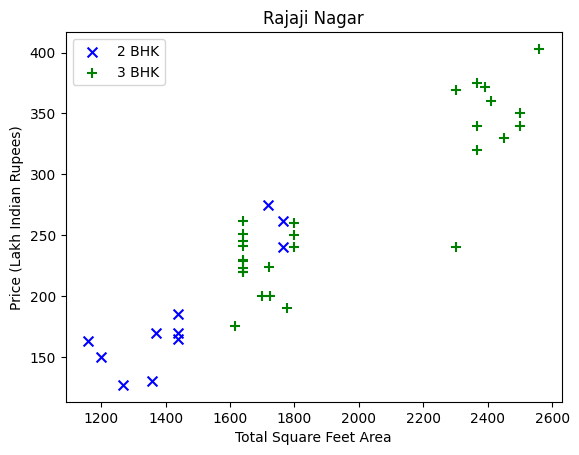

In [58]:
plot(data3,'Rajaji Nagar')

In [59]:
data3.location.unique()

array(['1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Phase JP Nagar',
       '6th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar',
       '9th Phase JP Nagar', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Balagere',
       'Banashankari', 'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage VI', 'Banaswadi', 'Bannerghatta',
       'Bannerghatta Road', 'Basavangudi', 'Basaveshwara Nagar',
       'Battarahalli', 'Begur', 'Begur Road', 'Bellandur', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'Bisuvanahalli', 'Bommanahalli',
       'Bommasandra', 'Bommasandra Industrial Area', 'Brookefield',
       'Budigere', 'CV Raman Nagar', 'Chandapura', 'Channasandra',
       'Chikkalasandra', 'Choodasandra', 'Dasanapura', 'Dasarahalli',
       'Devanahalli', 'Deva

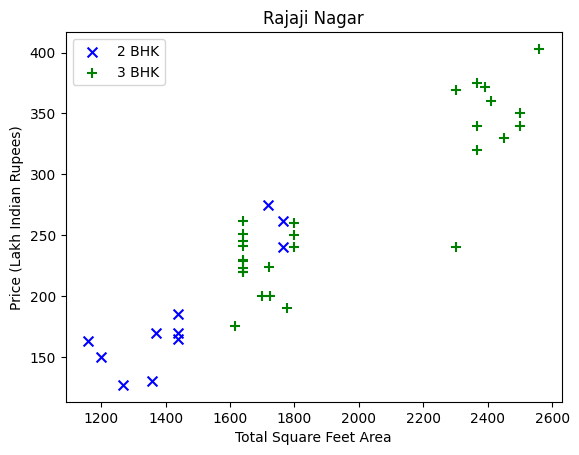

In [60]:
plot(data3,'Rajaji Nagar')

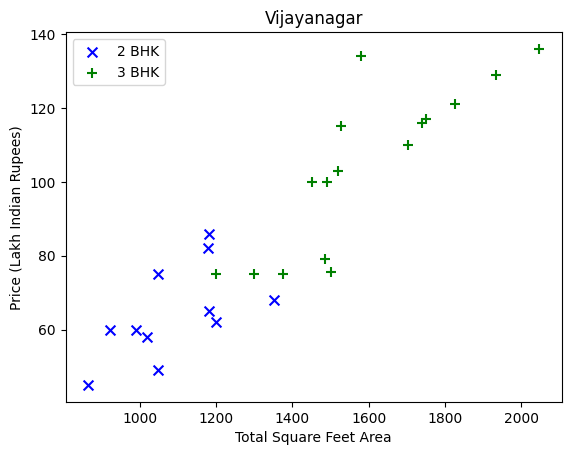

In [61]:
plot(data3,'Vijayanagar')

In [62]:
#given has the ability to remove outliers forexample those where lower bhk house have high prices versus high bhk in same area

In [63]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price/sqft']),
                'std': np.std(bhk_df['price/sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price/sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [64]:
data3.shape

(9454, 8)

In [65]:
data4 = remove_bhk_outliers(data3)

In [66]:
data4.shape

(6498, 8)

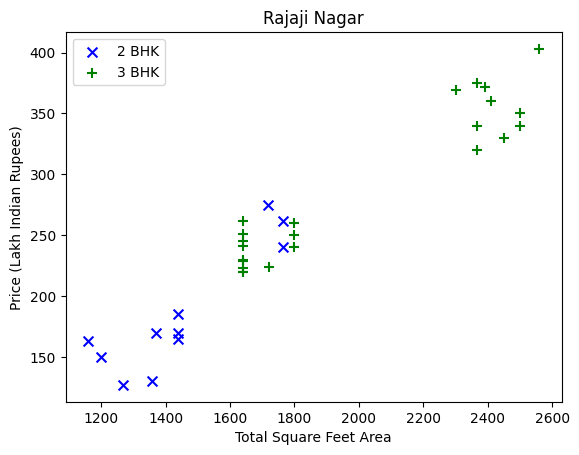

In [67]:
plot(data4,'Rajaji Nagar')

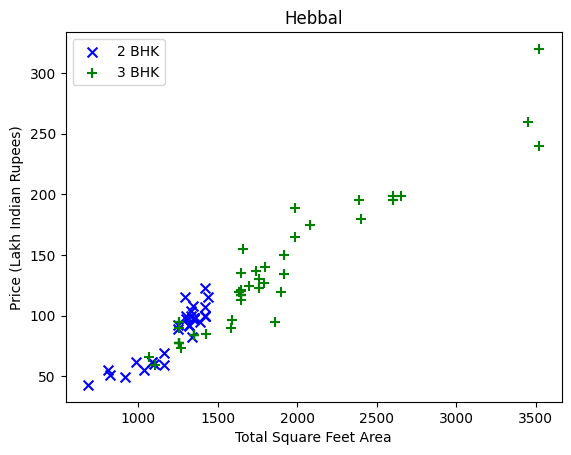

In [68]:
plot(data3,'Hebbal')

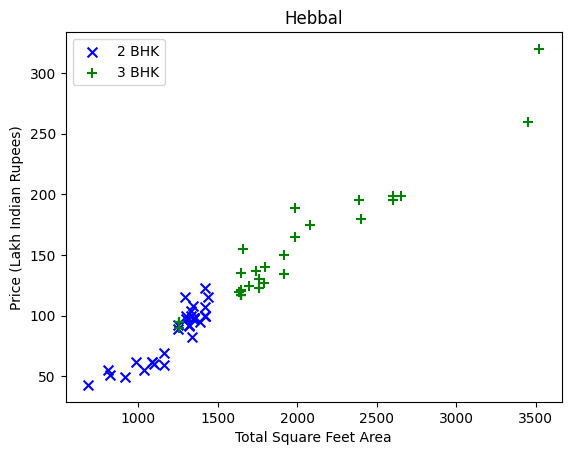

In [69]:
plot(data4,'Hebbal')

In [70]:
# you can see the difference that green (3 bhk) are removed whose prices are so much lower than blue (2 bhk) for the 
# same location and same area

Text(0, 0.5, 'count')

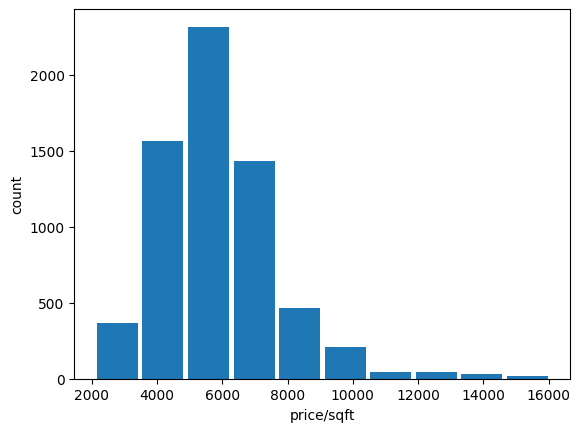

In [71]:
plt.hist(data4['price/sqft'],rwidth = 0.9)
plt.xlabel('price/sqft')
plt.ylabel('count')

Text(0, 0.5, 'count')

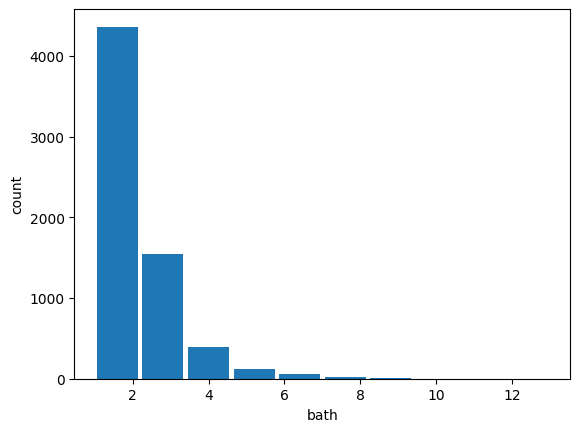

In [72]:
plt.hist(data4['bath'],rwidth = 0.9)
plt.xlabel('bath')
plt.ylabel('count')

Text(0, 0.5, 'count')

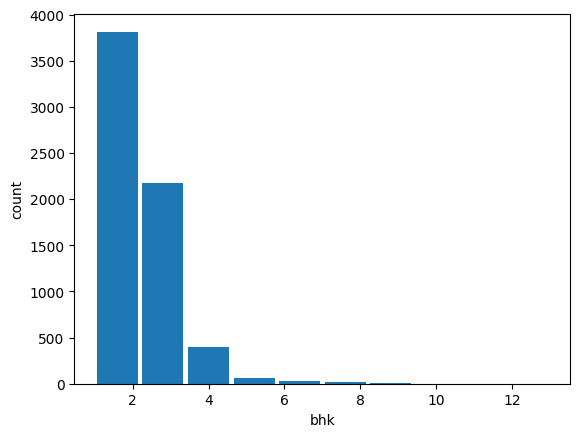

In [73]:
plt.hist(data4['bhk'],rwidth = 0.9)
plt.xlabel('bhk')
plt.ylabel('count')

Text(0, 0.5, 'count')

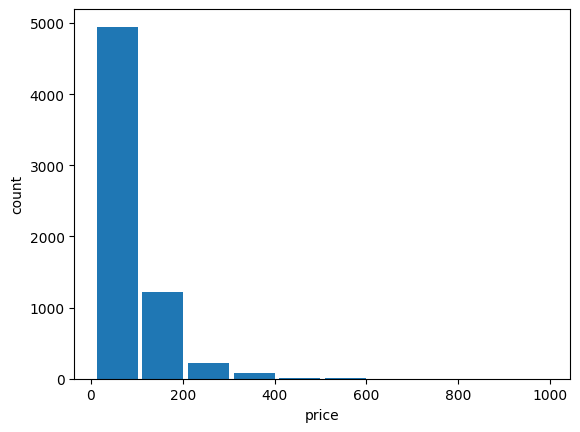

In [74]:
plt.hist(data4['price'],rwidth = 0.9)
plt.xlabel('price')
plt.ylabel('count')

Text(0, 0.5, 'count')

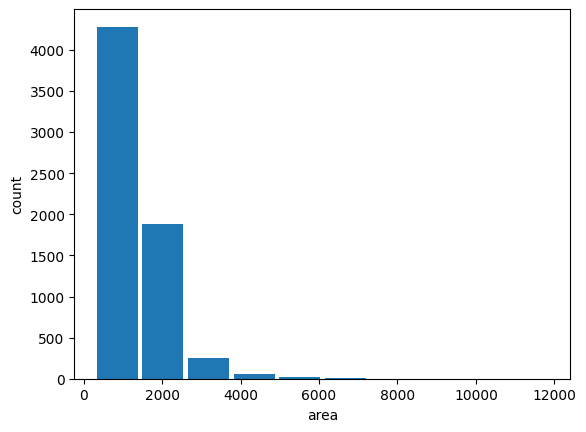

In [75]:
plt.hist(data4['area'],rwidth = 0.9)
plt.xlabel('area')
plt.ylabel('count')

In [76]:
data4.shape

(6498, 8)

In [77]:
data4 = data4[~(data4.bath > data4.bhk + 2)]  # removing outliers which has three more bath room than number of bed rooms

In [78]:
data4.shape

(6496, 8)

In [79]:
# now price/sqft can be dropped as it is not independed feature it is dependent on price and area which we are taking 
# both into account

In [80]:
data4.head()

,area_type,location,bath,balcony,price,bhk,area,price/sqft
1,Super built-up Area,1st Phase JP Nagar,3.0,1.0,167.0,3,1875.0,8906.666667
2,Super built-up Area,1st Phase JP Nagar,4.0,1.0,210.0,3,2065.0,10169.491525
3,Super built-up Area,1st Phase JP Nagar,3.0,2.0,225.0,3,2059.0,10927.634774
4,Super built-up Area,1st Phase JP Nagar,2.0,1.0,100.0,2,1394.0,7173.601148
5,Super built-up Area,1st Phase JP Nagar,2.0,2.0,93.0,2,1077.0,8635.097493


In [81]:
data4.drop('price/sqft',axis = 1,inplace = True)

In [82]:
data4.head(2)

,area_type,location,bath,balcony,price,bhk,area
1,Super built-up Area,1st Phase JP Nagar,3.0,1.0,167.0,3,1875.0
2,Super built-up Area,1st Phase JP Nagar,4.0,1.0,210.0,3,2065.0


### One Hot Encoding

In [83]:
dummies = pd.get_dummies(data4.location)

In [84]:
data5 = pd.concat([data4,dummies.drop('other',axis = 1)],axis = 1)

In [85]:
data5.shape

(6496, 186)

In [86]:
data5.head(2)

,area_type,location,bath,balcony,price,bhk,area,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,Super built-up Area,1st Phase JP Nagar,3.0,1.0,167.0,3,1875.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Super built-up Area,1st Phase JP Nagar,4.0,1.0,210.0,3,2065.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
dummies1 = pd.get_dummies(data5.area_type,drop_first=True)

In [88]:
dummies1.head(1)

,Carpet Area,Plot Area,Super built-up Area
1,False,False,True


In [89]:
dummies1 = dummies1.astype(int)

In [90]:
dummies1.head(1)

,Carpet Area,Plot Area,Super built-up Area
1,0,0,1


In [91]:
data6 = pd.concat([dummies1,data5],axis = 1)

In [92]:
data6.shape

(6496, 189)

In [93]:
data6.drop(['location','area_type'],inplace = True,axis = 1)

In [94]:
data6.shape

(6496, 187)

### Train-Test Split

In [95]:
x = data6.drop('price',axis = 1)

In [96]:
y = data6.price

In [97]:
x.shape

(6496, 186)

In [98]:
y.shape

(6496,)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 10, shuffle = True )

In [101]:
x_train.shape

(5196, 186)

In [102]:
x_test.shape

(1300, 186)

### Model Training

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lnr_model = LinearRegression()

In [105]:
lnr_model.fit(x_train,y_train)

LinearRegression()

In [106]:
lnr_model.score(x_test,y_test)

0.8973101191997662

In [107]:
# K-fold Cross Validation for Linear Regression

In [108]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.88375573, 0.91313247, 0.90999258, 0.90227717, 0.89625156])

In [109]:
# Using GridSearchCV

In [110]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
               'fit_intercept' : [True,False],
                'positive' : [True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['friedman_mse', 'squared_error', 'poisson'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [111]:
gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.901082,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.789100,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.824211,"{'criterion': 'squared_error', 'splitter': 'be..."


In [112]:
# as linear regression gives maximum accuracy

### Saving Model

In [113]:
import pickle

In [114]:
with open('model.pickle','wb') as f:
    pickle.dump(lnr_model,f)